In [6]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'ODBC Driver 18 for SQL Server']

In [163]:
import pyodbc
import pandas as pd  # Import the Pandas library

# Define las credenciales de conexión
server = "sqlplnserver.database.windows.net"
database = "DB_TablesPLN"
username = "username"
password = "password"

# Crea una conexión a la base de datos
connection = pyodbc.connect(
    f"Driver={'ODBC Driver 18 for SQL Server'};Server={server};Database={database};Uid={username};Pwd={password};TrustServerCertificate=yes"
)

# Realiza la consulta SQL
cursor = connection.cursor()
cursor.execute(
    """
SELECT TOP (50000) 
       [Fecha]
      ,[Presidente]
      ,[Orden]
      ,[Discurso]
      ,[Oracion]
      ,[TextoProcesado]
      ,[PalabrasEliminadas]
      ,[Clasificacion]
      ,[Valoracion]
      ,[Clasificacion2]
      ,[Valoracion2]
      ,[PalabrasFrecuentes]
      ,[PalabrasFrecuentes2]
  FROM [dbo].[DimTopicos]
"""
)
# Crea una lista con los títulos de las columnas
columnas = [
    "Fecha",
    "Presidente",
    "Orden",
    "Discurso",
    "Oracion",
    "TextoProcesado",
    "PalabrasEliminadas",
    "Clasificacion",
    "Valoracion",
    "Clasificacion2",
    "Valoracion2",
    "PalabrasFrecuentes",
    "PalabrasFrecuentes2",
]
# Obtén los resultados de la consulta como listas
rows = [columnas] + [list(row) for row in cursor.fetchall()]

# Crea un dataframe con los resultados de la consulta
df = pd.DataFrame(rows, columns=columnas)

# # Define la primera fila como los títulos de las columnas
df.columns = df.iloc[0]

# # Elimina la primera fila
df = df.iloc[1:]

# Cierra la conexión
connection.close()

# Imprime el dataframe
print(df)

0          Fecha         Presidente Orden  \
1     2022-01-01  Alberto Fernandez     1   
2     2022-01-01  Alberto Fernandez     2   
3     2022-01-01  Alberto Fernandez     3   
4     2022-01-01  Alberto Fernandez     4   
5     2022-01-01  Alberto Fernandez     5   
...          ...                ...   ...   
3702  2023-01-01      Dina Boluarte   608   
3703  2023-01-01      Dina Boluarte   609   
3704  2023-01-01      Dina Boluarte   610   
3705  2023-01-01      Dina Boluarte   611   
3706  2023-01-01      Dina Boluarte   612   

0                                 Discurso  \
1     Argentina_2022_Alberto_Fernandez.pdf   
2     Argentina_2022_Alberto_Fernandez.pdf   
3     Argentina_2022_Alberto_Fernandez.pdf   
4     Argentina_2022_Alberto_Fernandez.pdf   
5     Argentina_2022_Alberto_Fernandez.pdf   
...                                    ...   
3702           Peru_2023_Dina_Boluarte.pdf   
3703           Peru_2023_Dina_Boluarte.pdf   
3704           Peru_2023_Dina_Boluarte.pdf   

In [164]:
import seaborn as sns
import pandas as pd

# Obtiene el tipo de variable de cada columna
tipos_variables = df.dtypes

# Imprime el tipo de variable de cada columna
for columna, tipo_variable in tipos_variables.items():
    print(f"Columna: {columna}, Tipo de variable: {tipo_variable}")

Columna: Fecha, Tipo de variable: object
Columna: Presidente, Tipo de variable: object
Columna: Orden, Tipo de variable: object
Columna: Discurso, Tipo de variable: object
Columna: Oracion, Tipo de variable: object
Columna: TextoProcesado, Tipo de variable: object
Columna: PalabrasEliminadas, Tipo de variable: object
Columna: Clasificacion, Tipo de variable: object
Columna: Valoracion, Tipo de variable: object
Columna: Clasificacion2, Tipo de variable: object
Columna: Valoracion2, Tipo de variable: object
Columna: PalabrasFrecuentes, Tipo de variable: object
Columna: PalabrasFrecuentes2, Tipo de variable: object


In [165]:
# Estadísticas descriptivas
df.head()

,Fecha,Presidente,Orden,Discurso,Oracion,TextoProcesado,PalabrasEliminadas,Clasificacion,Valoracion,Clasificacion2,Valoracion2,PalabrasFrecuentes,PalabrasFrecuentes2
1,2022-01-01,Alberto Fernandez,1,Argentina_2022_Alberto_Fernandez.pdf,"Palabras del presidente de la Nación, Alberto ...",palabras presidente nación alberto fernández a...,"{del, de, la, en, el, por, los, de, de, desde,...",Neutral,0.0,Neutral,0.0,"['el', ',', 'de']","['palabra', 'presidente', 'nación']"
2,2022-01-01,Alberto Fernandez,2,Argentina_2022_Alberto_Fernandez.pdf,"En verdad, es un lindo día para que nos encont...",verdad lindo día encontremos día reflexión col...,"{en, es, un, para, que, nos, y, es, un, para, ...",Neutral,0.0,Neutral,0.0,"['para', ',', 'ser']","['día', 'verdad', 'lindo']"
3,2022-01-01,Alberto Fernandez,3,Argentina_2022_Alberto_Fernandez.pdf,"Cuando, en aquel mes de mayo, Cristina me prop...",aquel mes mayo cristina propuso c andidato ver...,"{cuando, en, de, me, que, sea, la, es, que, qu...",Neutral,0.0,Neutral,0.0,"['que', ',', 'ser']","['día', 'aquel', 'mes']"
4,2022-01-01,Alberto Fernandez,4,Argentina_2022_Alberto_Fernandez.pdf,La verdad es que los dos soñábamos con poner e...,verdad dos soñábamos poner marcha argentina pu...,"{la, es, que, los, con, en, una, que, estaba, ...",Neutral,0.0,Neutral,0.0,"['que', ';', 'el']","['verdad', 'dos', 'soñábar']"
5,2022-01-01,Alberto Fernandez,5,Argentina_2022_Alberto_Fernandez.pdf,Y creíamos que todo eso era capaces de reverti...,creíamos capaces revertirlo esperábamos día 99...,"{y, que, todo, eso, era, de, pero, lo, que, no...",Negativo,-0.296,Neutral,0.0,"['que', 'todo', ',']","['creíamos', 'capaz', 'revertir él']"


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 1 to 3706
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fecha                3706 non-null   object
 1   Presidente           3706 non-null   object
 2   Orden                3706 non-null   object
 3   Discurso             3706 non-null   object
 4   Oracion              3706 non-null   object
 5   TextoProcesado       3703 non-null   object
 6   PalabrasEliminadas   3706 non-null   object
 7   Clasificacion        3706 non-null   object
 8   Valoracion           3706 non-null   object
 9   Clasificacion2       3706 non-null   object
 10  Valoracion2          3706 non-null   object
 11  PalabrasFrecuentes   3706 non-null   object
 12  PalabrasFrecuentes2  3706 non-null   object
dtypes: object(13)
memory usage: 376.5+ KB


In [167]:
df["Orden"] = df["Orden"].astype("int")
df["Valoracion"] = pd.to_numeric(df["Valoracion"])
df["Valoracion2"] = pd.to_numeric(df["Valoracion2"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 1 to 3706
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha                3706 non-null   object 
 1   Presidente           3706 non-null   object 
 2   Orden                3706 non-null   int32  
 3   Discurso             3706 non-null   object 
 4   Oracion              3706 non-null   object 
 5   TextoProcesado       3703 non-null   object 
 6   PalabrasEliminadas   3706 non-null   object 
 7   Clasificacion        3706 non-null   object 
 8   Valoracion           3706 non-null   float64
 9   Clasificacion2       3706 non-null   object 
 10  Valoracion2          3706 non-null   float64
 11  PalabrasFrecuentes   3706 non-null   object 
 12  PalabrasFrecuentes2  3706 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 362.0+ KB


In [168]:
df.describe()

,Orden,Valoracion,Valoracion2
count,3706.000000,3706.000000,3706.000000
mean,186.930923,-0.025012,0.002796
std,134.814184,0.220833,0.124483
min,1.000000,-0.947700,-0.848100
25%,78.000000,0.000000,0.000000
50%,163.500000,0.000000,0.000000
75%,269.000000,0.000000,0.000000
max,612.000000,0.790600,0.985800


In [169]:
df.shape

(3706, 13)

In [170]:
df.columns.values

array(['Fecha', 'Presidente', 'Orden', 'Discurso', 'Oracion',
       'TextoProcesado', 'PalabrasEliminadas', 'Clasificacion',
       'Valoracion', 'Clasificacion2', 'Valoracion2',
       'PalabrasFrecuentes', 'PalabrasFrecuentes2'], dtype=object)

In [ ]:
valores_reemplazo = {"Positivo": 1, "Neutral": 0, "Negativo": -1}
df2["Clasificacion"] = df2["Clasificacion"].replace(valores_reemplazo)
df2["Clasificacion2"] = df2["Clasificacion2"].replace(valores_reemplazo)

df2["Clasificacion"] = df2["Clasificacion"].astype("int")
df2["Clasificacion2"] = df2["Clasificacion2"].astype("int")
df2.head()

,Fecha,Presidente,Orden,Discurso,Oracion,TextoProcesado,PalabrasEliminadas,Clasificacion,Valoracion,Clasificacion2,Valoracion2,PalabrasFrecuentes,PalabrasFrecuentes2
1,2022-01-01,Alberto Fernandez,1,Argentina_2022_Alberto_Fernandez.pdf,"Palabras del presidente de la Nación, Alberto ...",palabras presidente nación alberto fernández a...,"{del, de, la, en, el, por, los, de, de, desde,...",0,0.000,0,0.0,"['el', ',', 'de']","['palabra', 'presidente', 'nación']"
2,2022-01-01,Alberto Fernandez,2,Argentina_2022_Alberto_Fernandez.pdf,"En verdad, es un lindo día para que nos encont...",verdad lindo día encontremos día reflexión col...,"{en, es, un, para, que, nos, y, es, un, para, ...",0,0.000,0,0.0,"['para', ',', 'ser']","['día', 'verdad', 'lindo']"
3,2022-01-01,Alberto Fernandez,3,Argentina_2022_Alberto_Fernandez.pdf,"Cuando, en aquel mes de mayo, Cristina me prop...",aquel mes mayo cristina propuso c andidato ver...,"{cuando, en, de, me, que, sea, la, es, que, qu...",0,0.000,0,0.0,"['que', ',', 'ser']","['día', 'aquel', 'mes']"
4,2022-01-01,Alberto Fernandez,4,Argentina_2022_Alberto_Fernandez.pdf,La verdad es que los dos soñábamos con poner e...,verdad dos soñábamos poner marcha argentina pu...,"{la, es, que, los, con, en, una, que, estaba, ...",0,0.000,0,0.0,"['que', ';', 'el']","['verdad', 'dos', 'soñábar']"
5,2022-01-01,Alberto Fernandez,5,Argentina_2022_Alberto_Fernandez.pdf,Y creíamos que todo eso era capaces de reverti...,creíamos capaces revertirlo esperábamos día 99...,"{y, que, todo, eso, era, de, pero, lo, que, no...",-1,-0.296,0,0.0,"['que', 'todo', ',']","['creíamos', 'capaz', 'revertir él']"


In [ ]:
# Obtiene los valores únicos de la columna "nombre"
valores_unicos = df["Clasificacion"].unique()
# Imprime los valores únicos
print(valores_unicos)
df2 = df

[ 0 -1  1]


In [ ]:
import category_encoders as ce
import pandas as pd

# Selecciona las columnas deseadas de df2
df2_seleccion = df2[["Presidente", "PalabrasFrecuentes2"]]
df2_seleccion.head()

,Presidente,PalabrasFrecuentes2
1,Alberto Fernandez,"['palabra', 'presidente', 'nación']"
2,Alberto Fernandez,"['día', 'verdad', 'lindo']"
3,Alberto Fernandez,"['día', 'aquel', 'mes']"
4,Alberto Fernandez,"['verdad', 'dos', 'soñábar']"
5,Alberto Fernandez,"['creíamos', 'capaz', 'revertir él']"


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ["Presidente", "PalabrasFrecuentes2"]:
    df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])

df2["Presidente_codificado"] = df2_seleccion["Presidente"]

df2["PalabrasFrecuentes2_codificado"] = df2_seleccion["PalabrasFrecuentes2"]
df2_seleccion.head()

df2 = pd.concat([df2, df2_seleccion], axis=1)

df2.head()

C:\Users\linkl\AppData\Local\Temp\ipykernel_17364\290799991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])
C:\Users\linkl\AppData\Local\Temp\ipykernel_17364\290799991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seleccion[col] = encoder.fit_transform(df2_seleccion[col])


,Fecha,Presidente,Orden,Discurso,Oracion,TextoProcesado,PalabrasEliminadas,Clasificacion,Valoracion,Clasificacion2,Valoracion2,PalabrasFrecuentes,PalabrasFrecuentes2,Presidente_codificado,PalabrasFrecuentes2_codificado,Presidente,PalabrasFrecuentes2
1,2022-01-01,Alberto Fernandez,1,Argentina_2022_Alberto_Fernandez.pdf,"Palabras del presidente de la Nación, Alberto ...",palabras presidente nación alberto fernández a...,"{del, de, la, en, el, por, los, de, de, desde,...",0,0.000,0,0.0,"['el', ',', 'de']","['palabra', 'presidente', 'nación']",0,2346,0,2346
2,2022-01-01,Alberto Fernandez,2,Argentina_2022_Alberto_Fernandez.pdf,"En verdad, es un lindo día para que nos encont...",verdad lindo día encontremos día reflexión col...,"{en, es, un, para, que, nos, y, es, un, para, ...",0,0.000,0,0.0,"['para', ',', 'ser']","['día', 'verdad', 'lindo']",0,1066,0,1066
3,2022-01-01,Alberto Fernandez,3,Argentina_2022_Alberto_Fernandez.pdf,"Cuando, en aquel mes de mayo, Cristina me prop...",aquel mes mayo cristina propuso c andidato ver...,"{cuando, en, de, me, que, sea, la, es, que, qu...",0,0.000,0,0.0,"['que', ',', 'ser']","['día', 'aquel', 'mes']",0,1060,0,1060
4,2022-01-01,Alberto Fernandez,4,Argentina_2022_Alberto_Fernandez.pdf,La verdad es que los dos soñábamos con poner e...,verdad dos soñábamos poner marcha argentina pu...,"{la, es, que, los, con, en, una, que, estaba, ...",0,0.000,0,0.0,"['que', ';', 'el']","['verdad', 'dos', 'soñábar']",0,3489,0,3489
5,2022-01-01,Alberto Fernandez,5,Argentina_2022_Alberto_Fernandez.pdf,Y creíamos que todo eso era capaces de reverti...,creíamos capaces revertirlo esperábamos día 99...,"{y, que, todo, eso, era, de, pero, lo, que, no...",-1,-0.296,0,0.0,"['que', 'todo', ',']","['creíamos', 'capaz', 'revertir él']",0,809,0,809


In [ ]:
df2.loc[:, df2.dtypes == "object"] = df2.select_dtypes(["object"]).apply(
    lambda x: x.astype("category")
)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 1 to 3706
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Fecha                           3706 non-null   category
 1   Presidente                      3706 non-null   category
 2   Orden                           3706 non-null   int32   
 3   Discurso                        3706 non-null   category
 4   Oracion                         3706 non-null   category
 5   TextoProcesado                  3703 non-null   category
 6   PalabrasEliminadas              3706 non-null   category
 7   Clasificacion                   3706 non-null   int32   
 8   Valoracion                      3706 non-null   float64 
 9   Clasificacion2                  3706 non-null   int32   
 10  Valoracion2                     3706 non-null   float64 
 11  PalabrasFrecuentes              3706 non-null   category
 12  PalabrasFrecuentes2 

In [ ]:
data2 = df2
data2 = data2.drop(
    columns=["Presidente", "PalabrasFrecuentes2", "Orden"], errors="ignore"
)
data2.head()

,Fecha,Discurso,Oracion,TextoProcesado,PalabrasEliminadas,Clasificacion,Valoracion,Clasificacion2,Valoracion2,PalabrasFrecuentes,Presidente_codificado,PalabrasFrecuentes2_codificado
1,2022-01-01,Argentina_2022_Alberto_Fernandez.pdf,"Palabras del presidente de la Nación, Alberto ...",palabras presidente nación alberto fernández a...,"{del, de, la, en, el, por, los, de, de, desde,...",0,0.000,0,0.0,"['el', ',', 'de']",0,2346
2,2022-01-01,Argentina_2022_Alberto_Fernandez.pdf,"En verdad, es un lindo día para que nos encont...",verdad lindo día encontremos día reflexión col...,"{en, es, un, para, que, nos, y, es, un, para, ...",0,0.000,0,0.0,"['para', ',', 'ser']",0,1066
3,2022-01-01,Argentina_2022_Alberto_Fernandez.pdf,"Cuando, en aquel mes de mayo, Cristina me prop...",aquel mes mayo cristina propuso c andidato ver...,"{cuando, en, de, me, que, sea, la, es, que, qu...",0,0.000,0,0.0,"['que', ',', 'ser']",0,1060
4,2022-01-01,Argentina_2022_Alberto_Fernandez.pdf,La verdad es que los dos soñábamos con poner e...,verdad dos soñábamos poner marcha argentina pu...,"{la, es, que, los, con, en, una, que, estaba, ...",0,0.000,0,0.0,"['que', ';', 'el']",0,3489
5,2022-01-01,Argentina_2022_Alberto_Fernandez.pdf,Y creíamos que todo eso era capaces de reverti...,creíamos capaces revertirlo esperábamos día 99...,"{y, que, todo, eso, era, de, pero, lo, que, no...",-1,-0.296,0,0.0,"['que', 'todo', ',']",0,809


In [ ]:
data2.shape

(3706, 13)

In [ ]:
""" is any missing values across columns"""
data2.isnull().any()

0
Fecha                             False
Orden                             False
Discurso                          False
Oracion                           False
TextoProcesado                     True
PalabrasEliminadas                False
Clasificacion                     False
Valoracion                        False
Clasificacion2                    False
Valoracion2                       False
PalabrasFrecuentes                False
Presidente_codificado             False
PalabrasFrecuentes2_codificado    False
dtype: bool

In [ ]:
""" count of missing values of the entire dataframe"""
data2.isnull().sum().sum()

3

In [ ]:
data2.isnull().sum()

0
Fecha                             0
Orden                             0
Discurso                          0
Oracion                           0
TextoProcesado                    3
PalabrasEliminadas                0
Clasificacion                     0
Valoracion                        0
Clasificacion2                    0
Valoracion2                       0
PalabrasFrecuentes                0
Presidente_codificado             0
PalabrasFrecuentes2_codificado    0
dtype: int64

In [ ]:
import pandas as pd

total = data2.isnull().sum().sort_values(ascending=False)
percent_1 = data2.isnull().sum() / data2.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data

,Total,%
0,,
TextoProcesado,3,0.1
Fecha,0,0.0
Orden,0,0.0
Discurso,0,0.0
Oracion,0,0.0
PalabrasEliminadas,0,0.0
Clasificacion,0,0.0
Valoracion,0,0.0
Clasificacion2,0,0.0


In [ ]:
data2.describe()

,Clasificacion,Valoracion,Clasificacion2,Valoracion2,Presidente_codificado,PalabrasFrecuentes2_codificado
count,3706.000000,3706.000000,3706.000000,3706.000000,3706.000000,3706.000000
mean,-0.048300,-0.025012,0.014031,0.002796,4.868861,1799.443875
std,0.530921,0.220833,0.259383,0.124483,2.439899,1053.280131
min,-1.000000,-0.947700,-1.000000,-0.848100,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,884.250000
50%,0.000000,0.000000,0.000000,0.000000,5.000000,1803.500000
75%,0.000000,0.000000,0.000000,0.000000,7.000000,2707.750000
max,1.000000,0.790600,1.000000,0.985800,8.000000,3623.000000


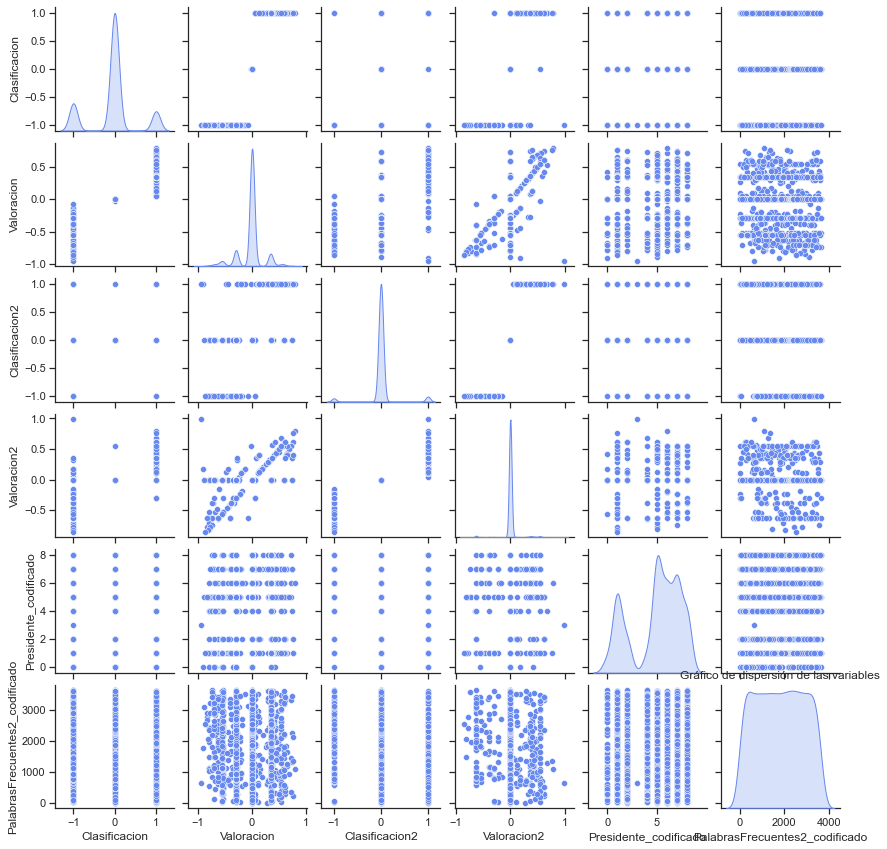

In [ ]:
# Establecer el estilo y los colores
sns.set(style="ticks", palette="coolwarm")

# Generar el gráfico pairplot
sns.pairplot(data2, height=2, diag_kind="kde", palette="coolwarm")

# Personalizar las etiquetas de los ejes
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

# Añadir un título al gráfico
plt.title("Gráfico de dispersión de las variables")

# Mostrar el gráfico
plt.show()

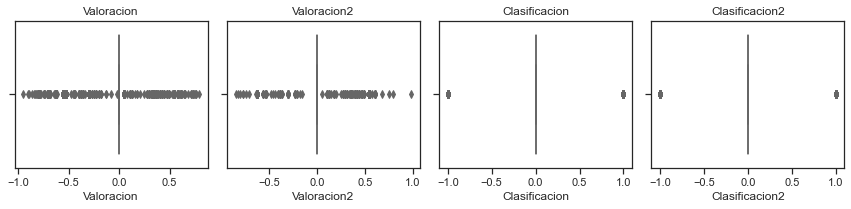

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Establece el tamaño del gráfico

# Selecciona las columnas relevantes (excluyendo "quality")
columns = ["Valoracion", "Valoracion2", "Clasificacion", "Clasificacion2"]
color_palette = sns.color_palette(
    "coolwarm"
)  # Ajustar el brillo de la paleta de colores

# Genera los gráficos de cajas para las columnas seleccionadas
for i, col in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=data2[col])
    plt.title(col)
plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()  # Muestra los gráficos de cajas

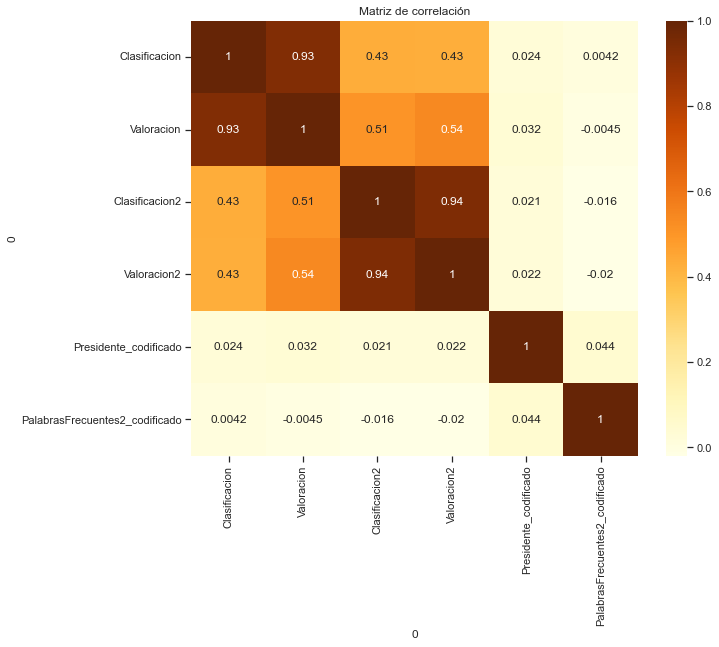

In [ ]:
correlation_matrix = data2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr")
plt.title("Matriz de correlación")
plt.show()